In [1]:
import tensorflow as tf
print(tf.__version__)
(X_train, y_train), (X_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

2.10.0


In [2]:
# 입력층, 은닉층 설정 및 모델 선언
model = tf.keras.Sequential( layers=[
    tf.keras.layers.Flatten(input_shape=(28,28)), # 입력받은 2차원 데이터를 1차원화
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")    
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 최적화 모델, 비용함수, 평가 척도 선언
model.compile (optimizer="adam",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

In [4]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4842 - accuracy: 0.7504
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5904 - accuracy: 0.8376
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4710 - accuracy: 0.8705
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4168 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3890 - accuracy: 0.8966


In [5]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\n테스트 정확도: ", test_acc)

313/313 - 0s - loss: 0.2785 - accuracy: 0.9325 - 396ms/epoch - 1ms/step

테스트 정확도:  0.9325000047683716


313/313 [==============================] - 0s 1ms/step
예측값: 7, 실제값: 7


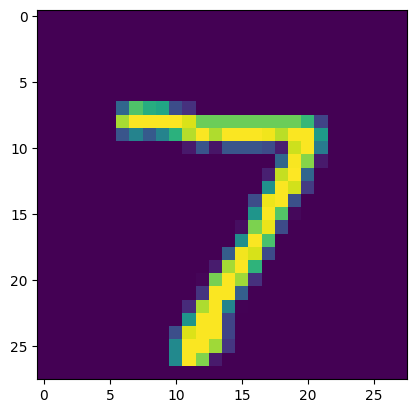

In [6]:
# 개별 예측 확인
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(X_test)
pred = np.argmax(predictions[0])

print ("예측값: {}, 실제값: {}".format(pred, y_test[0]))

plt.imshow(X_test[0])
plt.show()

In [7]:
# 학습 내용 확인 (손실 함수의 값과 accuracy 확인)
history.history

{'loss': [2.4842467308044434,
  0.5903633236885071,
  0.4709722101688385,
  0.4167827367782593,
  0.3889799416065216],
 'accuracy': [0.7503833174705505,
  0.8375833630561829,
  0.8705166578292847,
  0.885783314704895,
  0.8966000080108643]}

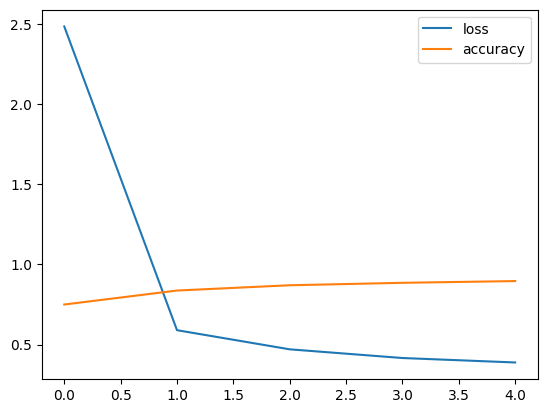

In [8]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.legend(["loss", "accuracy"])
plt.show()
